# Problem Statement : -

A basic understanding of risk analytics in banking and financial services and minimise the risk of losing money while lending to customers. to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan.

The data 'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

### Import the required libraries and warnings

In [1]:
# import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import plotly.express as px
%matplotlib inline

### Read the files

In [3]:
# Read the given or provided data
df = pd.read_csv("application_data.csv")
df1 = pd.read_csv("previous_application.csv")

### Check the structure of the 'application_data' (Normal routine check)

In [4]:
# Check the structure of the data df head()
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# Tail of the df data
df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [6]:
# Shape of the application data
df.shape

(307511, 122)

In [7]:
# application data describe
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
# info of the given data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Data Quality check and missing values

In [9]:
# find the number of null values in the given dataset
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
# find the percentage of the null values so the we can identify which columns we should drop
df.isnull().sum()/(len(df))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [11]:
# Identify the columns above 50% null values
df.columns[((df.isnull().sum()/(len(df))*100) > 50)]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [12]:
# drop all the columns which are 50% and above values are null or missing
df.drop(["OWN_CAR_AGE","EXT_SOURCE_1","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG"\
        ,"ENTRANCES_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG"\
        ,"NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE"\
        ,"ENTRANCES_MODE","FLOORSMIN_MODE","LANDAREA_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE"\
        ,"NONLIVINGAREA_MODE","APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI"\
        ,"ENTRANCES_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI"\
        ,"NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE"],axis=1, inplace=True)

In [13]:
# Again check the dataset
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

In [14]:
# check missing values again
df.isnull().sum()/(len(df))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [15]:
# Check the columns having 40% and above null values
df.columns[((df.isnull().sum()/(len(df))*100) > 40)]

Index(['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [16]:
# drop all the columns which are 40% and above values are null or missing
df.drop(["YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI"\
        ,"FLOORSMAX_MEDI","TOTALAREA_MODE","EMERGENCYSTATE_MODE"],axis=1,inplace=True)

In [17]:
# Check the dataset
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [18]:
# Again check the null values
df.isnull().sum()/(len(df))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [19]:
# Info after dropping the columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Check the columns having below 13% null values and impute those columns with suitable values

In [20]:
# Check the columns having below 13% null values
list(df.columns[(df.isnull().mean()<=0.13) & (df.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [21]:
# Value count of Amt_annuity column
df.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [22]:
# Median of AMT_ANNUITY column
df.AMT_ANNUITY.median()

24903.0

In [23]:
# Impute the median value in the column
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(),inplace=True)

In [24]:
# Clarify is their any null value present in the column
df.AMT_ANNUITY.isnull().sum()

0

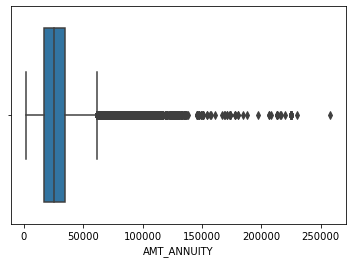

In [25]:
# check for outliers 
sns.boxplot(df.AMT_ANNUITY)
plt.show()

Since Amt_Annuity has outliers, so the column is imputed by Median.

In [26]:
# Value Counts of AMT_GOODS_PRICE column
df.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [27]:
# Median of the column
df.AMT_GOODS_PRICE.median()

450000.0

In [28]:
# Impute the column with median value 
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(),inplace=True)

In [29]:
# Check the null value after imputing
df.AMT_GOODS_PRICE.isnull().sum()

0

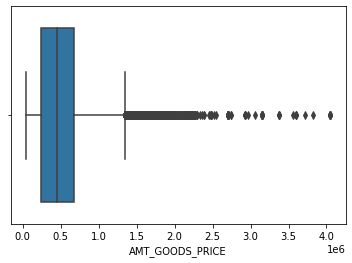

In [30]:
# Check for the outliers
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

Since Amt_GOODS_PRICE has outliers, so the column is imputed by Median.

In [31]:
# Value Counts of the NAME_TYPE_SUITE column
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
# As the column is categorical we choose the mode of the column 
df.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [33]:
# Impute the column with mode value
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [34]:
# Check the null value after the column is imputed
df.NAME_TYPE_SUITE.isnull().sum()

0

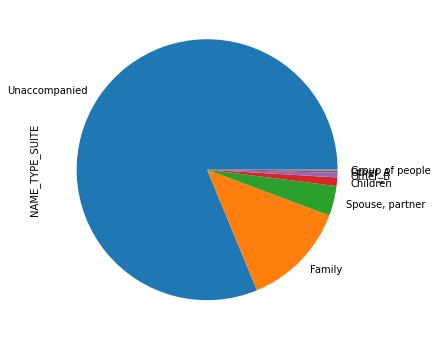

In [35]:
# Pie plot of the column
plt.figure(figsize=[12,6])
df.NAME_TYPE_SUITE.value_counts().plot.pie()
plt.show()

Since the NAME_TYPE_SUITE column is categorical the column is imputed by mode value of the column

In [36]:
# value count of the CNT_FAM_MEMBERS column
df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [37]:
# Median of the column
df.CNT_FAM_MEMBERS.median()

2.0

In [38]:
# Impute the column with median value
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.median(),inplace=True)

In [39]:
# Check the null value after the column is imputed
df.CNT_FAM_MEMBERS.isnull().sum()

0

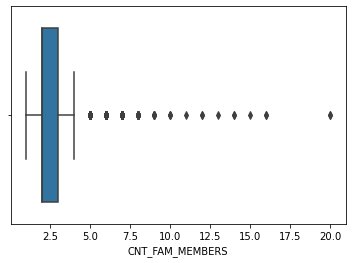

In [40]:
# Check the outliers
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

Since the CNT_FAM_MEMBERS column have outliers the column is imputed by median.

In [41]:
# Value counts of the EXT_SOURCE_2 column  
df.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

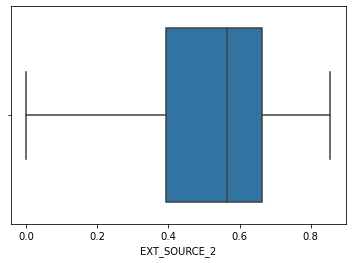

In [42]:
# Check the outliers
sns.boxplot(df.EXT_SOURCE_2)
plt.show()

Since the EXT_SOURCE_2 has no outliers, so the column can be imputed by mean or by median

In [43]:
# Median of the column
df.EXT_SOURCE_2.median()

0.5659614260608526

In [44]:
# Impute the column by median value
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median,inplace=True)

In [45]:
# Check the null value after the column is imputed
df.EXT_SOURCE_2.isnull().sum()

0

In [46]:
# Check the info of df data set
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Cleaning the dataset

In [47]:
# Check the values of the date
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307506       -9327           -236            -8456.0            -1982
307507      -20775         365243            -4388.0            -4090
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[307511 rows x 4 columns]

In [48]:
# Convert the negative values into positive
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].abs()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0             9461            637             3648.0             2120
1            16765           1188             1186.0              291
2            19046            225             4260.0             2531
3            19005           3039             9833.0             2437
4            19932           3038             4311.0             3458
...            ...            ...                ...              ...
307506        9327            236             8456.0             1982
307507       20775         365243             4388.0             4090
307508       14966           7921             6737.0             5150
307509       11961           4786             2562.0              931
307510       16856           1262             5128.0              410

[307511 rows x 4 columns]

In [49]:
# Check the dtypes of df dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [50]:
# Check the value counts of the CODE_GENDER column
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [51]:
# Replace the "M","F" to "Male","Female" and drop the "XNA" value value
df = df[df.CODE_GENDER != "XNA"]
df.CODE_GENDER.replace(["M","F"],["Male","Female"],inplace=True)

In [52]:
# Check does the values get replaced
df.CODE_GENDER.value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

In [53]:
# Binning variables for analysis
df.AMT_INCOME_TOTAL.quantile([0,0.2,0.4,0.6,0.8,1])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
# AMT_INCOME_TOTAL column value are binned in the 5 categogies
df.INCOME = pd.qcut(df.AMT_INCOME_TOTAL,q=[0,0.2,0.4,0.6,0.8,1],labels=["Very Low","Low","Medium","High","Very High"])

In [55]:
# Binning days_birth
abs(df.DAYS_BIRTH.quantile([0,0.2,0.4,0.6,0.8,1]))

0.0    25229.0
0.2    20474.0
0.4    17220.0
0.6    14416.0
0.8    11694.0
1.0     7489.0
Name: DAYS_BIRTH, dtype: float64

In [56]:
# Convert the no. of days into years od DAYS_BIRTH column
df.Age = abs(df.DAYS_BIRTH)//365

In [57]:
# describe of the age column
df.Age.describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [58]:
# DAYS_BIRTH column value are binned in the 5 categogies
df.Age_group = pd.cut(df.Age,[0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60","60>"])

In [59]:
# Checking for imbalance in target
df.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

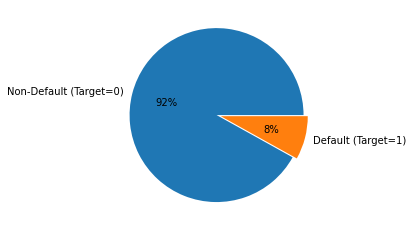

In [60]:
# Pie plot of the TARGET column and check of it's imbalance
plt.pie(df.TARGET.value_counts(normalize=True)*100,labels=["Non-Default (Target=0)","Default (Target=1)"],explode=(0,0.05),autopct="%1.f%%")
plt.show()

In [61]:
# Convert then into 2 variables
df_0 = df[df.TARGET == 0]

df_1 = df[df.TARGET == 1]

### Univariate Analysis of df dataset by categorical

In [62]:
# univariate analysis for categorical columns
def unicateplot(var):
    
    plt.style.use("ggplot")
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
    sns.countplot(x=var,data=df_0,ax=ax1)
    ax1.set_ylabel("Counts")
    ax1.set_title(f"Dispensation of {var} for Non-Defaulter")
    ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")
    for p in ax1.patches:
        ax1.annotate('{:1f}%'.format((p.get_height()/len(df_0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var,data=df_1,ax=ax2)
    ax2.set_ylabel("Counts")
    ax2.set_title(f"Dispensation of {var} for Defaulter")
    ax2.set_xticklabels(ax2.get_xticklabels(),ha="right")
    for p in ax2.patches:
        ax2.annotate('{:1f}%'.format((p.get_height()/len(df_1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

In [63]:
# Check the columns on which the categorical univariate analysis can perform
list(df.columns[df.dtypes=="object"])

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2']

In [64]:
unicateplot("NAME_CONTRACT_TYPE")

As per the above plots, the cash loans value is higher in non-defaulters then the defaulters. And the Revolving loans are much less on both.

So the conclusion comes is the CONTRACT Type that the people prefers more on cash loans rather revolving the loans.

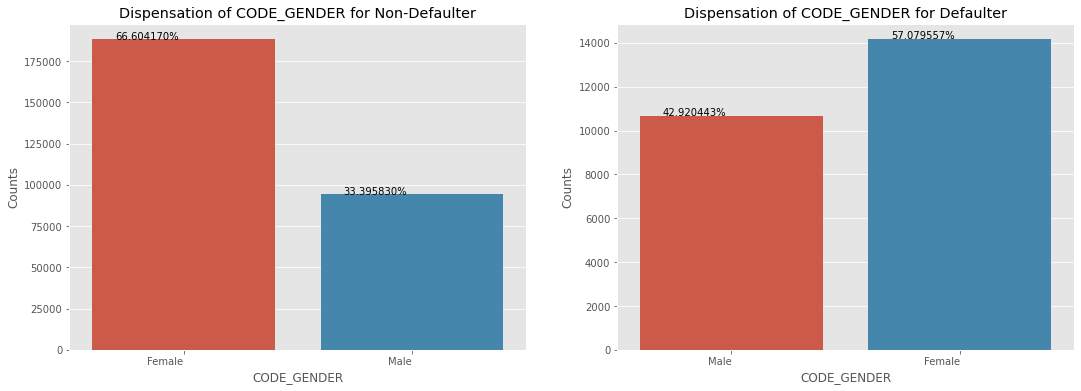

In [65]:
unicateplot("CODE_GENDER")

We can see that Female contribute more than 67% to the non-defaulters while 57% to the defaulters. We can conclude that. We see more female applying for loans than males and hence the more number of female defaulters as well.

But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.

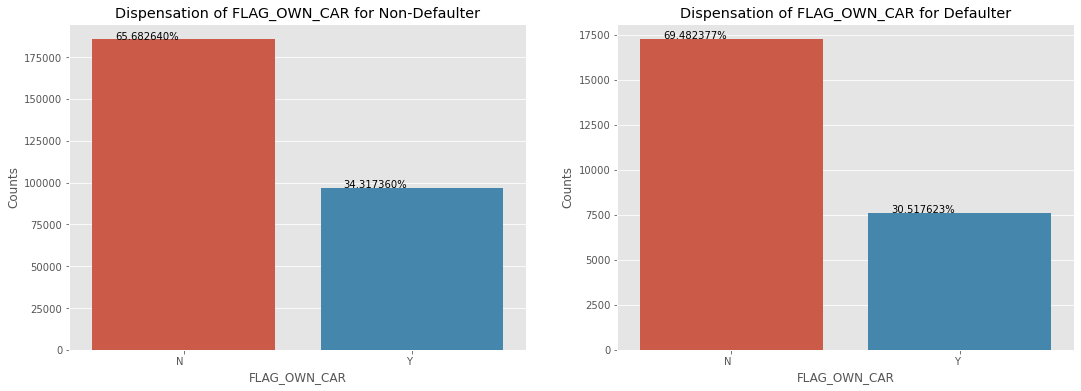

In [66]:
unicateplot("FLAG_OWN_CAR")

We can see that people with cars contribute more than 65% to the non-defaulters while almost 70% to the defaulters. We can conclude that While people who have car default more often, the reason could be there are simply more people without cars.

Looking at the both charts, we can conclude that the rate of default of people having car is low compared to people who don't.

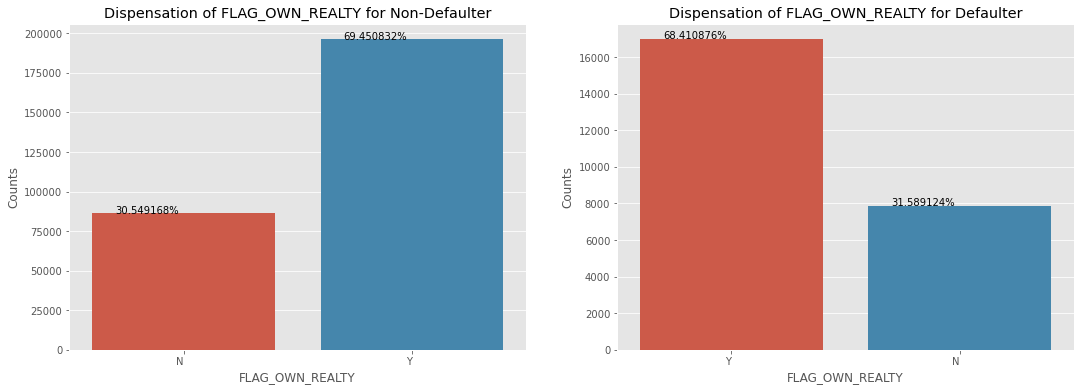

In [67]:
unicateplot("FLAG_OWN_REALTY")

We can see that people with cars contribute more than 70% to the non-defaulters while almost 68% to the defaulters. We can conclude that While people who have car default more often, the reason could be there are simply more people without cars.

Looking at the both charts, we can conclude that the rate of default of people having car is low compared to people who don't.


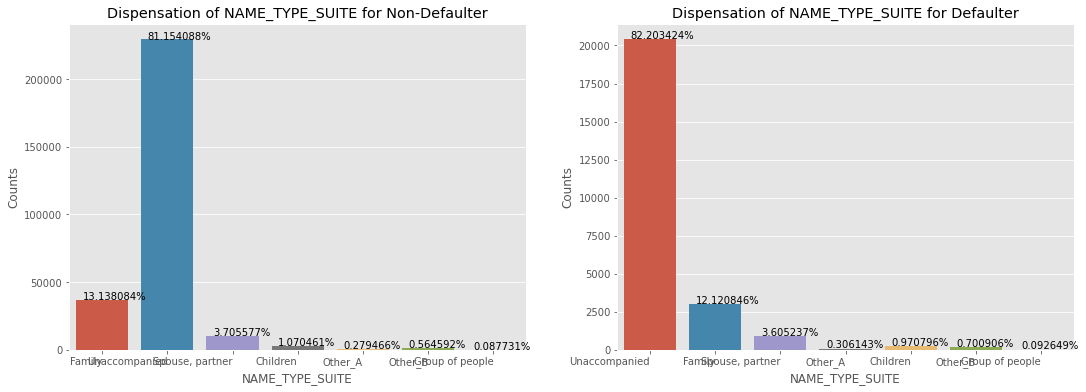

In [68]:
unicateplot("NAME_TYPE_SUITE")

As the graph states that, the embuse are applying much more than the others to the Non-Defaulters. And Unaccompanied to the Dafaulters.

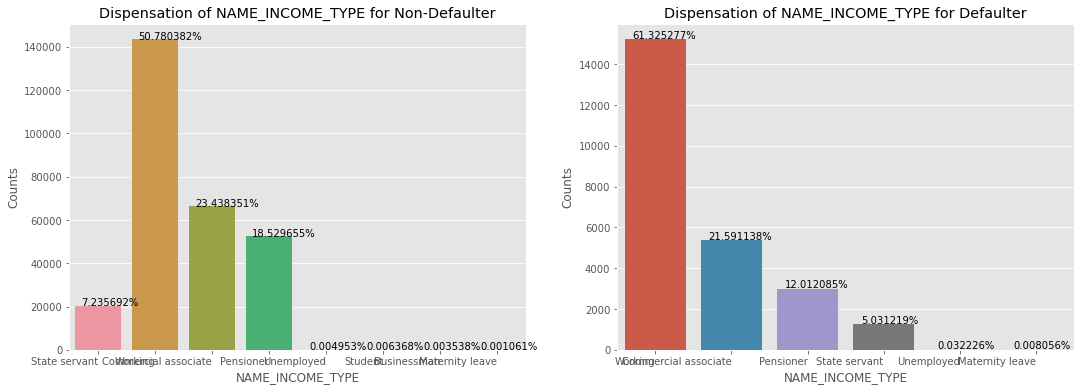

In [69]:
unicateplot("NAME_INCOME_TYPE")

We can notice that the students don't default. The reason could be they are not required to pay during the time they are students. We can also see that the BusinessMen never default. Most of the loans are distributed to working class people.

We also see that working class people contribute more than 51% to non defaulters while they contribute to more then 62% of the defaulters. Clearly, the chances of defaulting are more in their case.

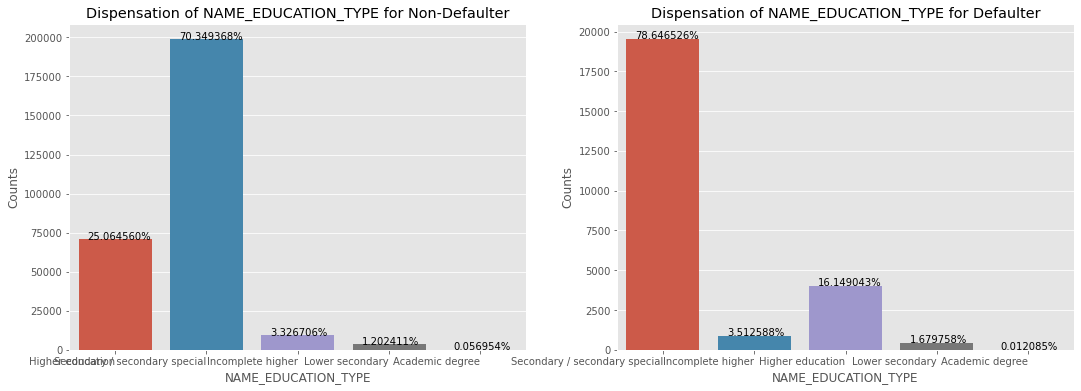

In [70]:
unicateplot("NAME_EDUCATION_TYPE")

The above plots are the distribution of the education tpye people applying for the loans.

As we can clear see or can conclude that higher secondary people applies more to the Non-Defaulters. And secondary/secondary special people in Defaulters

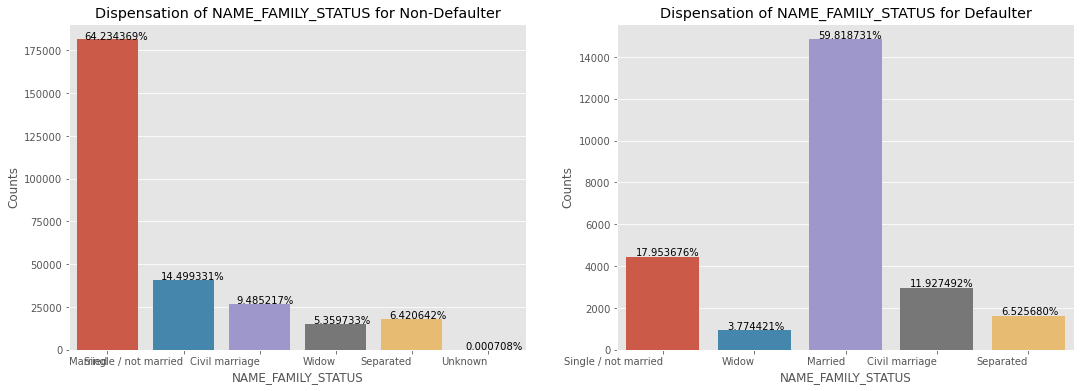

In [71]:
unicateplot("NAME_FAMILY_STATUS")

Married people tend to apply for more loans comparatively. But from the graph we see that Single/non Married people contribute 65% to Non Defaulters and more than 59% to the defaulters. So there is more risk associated with them.

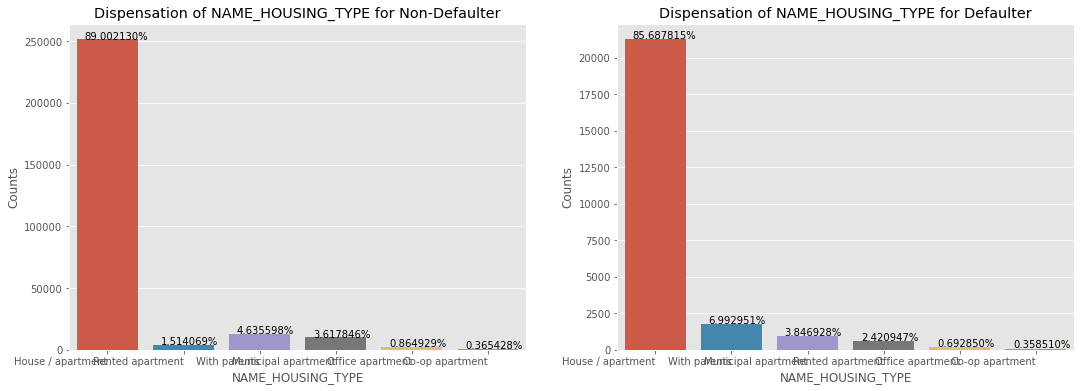

In [72]:
unicateplot("NAME_HOUSING_TYPE")

It is clear from the graph that people who have House/Appartment, tend to apply for more loans. People living with parents tend to default more often when compared with others.The reason could be their living expenses are more due to their parents living with them.

In [73]:
unicateplot("OCCUPATION_TYPE")

In [74]:
unicateplot("WEEKDAY_APPR_PROCESS_START")

In [75]:
# correlation in df_0
list(df.columns[df.dtypes=="float"])

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [76]:
# Check the columns dtypes=="int64"
list(df.columns[df.dtypes=="int64"])

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [77]:
# Correlation between the some selected columns to Non-Dedaulters.
df_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS"\
     ,"REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr().abs()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.342801     0.418949   
AMT_CREDIT                           0.342801    1.000000     0.771296   
AMT_ANNUITY                          0.418949    0.771296     1.000000   
AMT_GOODS_PRICE                      0.349425    0.987024     0.776421   
REGION_POPULATION_RELATIVE           0.167850    0.100608     0.120980   
CNT_FAM_MEMBERS                      0.034257    0.064544     0.075798   
REGION_RATING_CLIENT                 0.186577    0.103334     0.132117   
REGION_RATING_CLIENT_W_CITY          0.200470    0.112235     0.145142   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                    0.349425                    0.167850   
AMT_CREDIT                          0.987024                    0.100608   
AMT_ANNUITY                         0.776421                    0.120980   
AMT_GOODS_PRICE                     1.000000                    0.103828   
REGION_POPULATION_RELATIVE          0.103828                    1.000000   
CNT_FAM_MEMBERS                     0.062773                    0.023431   
REGION_RATING_CLIENT                0.104354                    0.539010   
REGION_RATING_CLIENT_W_CITY         0.112577                    0.537307   

                             CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
AMT_INCOME_TOTAL                    0.034257              0.186577   
AMT_CREDIT                          0.064544              0.103334   
AMT_ANNUITY                         0.075798              0.132117   
AMT_GOODS_PRICE                     0.062773              0.104354   
REGION_POPULATION_RELATIVE          0.023431              0.539010   
CNT_FAM_MEMBERS                     1.000000              0.027875   
REGION_RATING_CLIENT                0.027875              1.000000   
REGION_RATING_CLIENT_W_CITY         0.028659              0.950148   

                             REGION_RATING_CLIENT_W_CITY  
AMT_INCOME_TOTAL                                0.200470  
AMT_CREDIT                                      0.112235  
AMT_ANNUITY                                     0.145142  
AMT_GOODS_PRICE                                 0.112577  
REGION_POPULATION_RELATIVE                      0.537307  
CNT_FAM_MEMBERS                                 0.028659  
REGION_RATING_CLIENT                            0.950148  
REGION_RATING_CLIENT_W_CITY                     1.000000

In [78]:
# Correlation between the some selected columns to Dedaulters.
df_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS"\
     ,"REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr().abs()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.038131     0.046421   
AMT_CREDIT                           0.038131    1.000000     0.752195   
AMT_ANNUITY                          0.046421    0.752195     1.000000   
AMT_GOODS_PRICE                      0.037591    0.982783     0.752295   
REGION_POPULATION_RELATIVE           0.009135    0.069161     0.071690   
CNT_FAM_MEMBERS                      0.006654    0.051224     0.075711   
REGION_RATING_CLIENT                 0.021486    0.059193     0.073784   
REGION_RATING_CLIENT_W_CITY          0.022808    0.071377     0.089291   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                    0.037591                    0.009135   
AMT_CREDIT                          0.982783                    0.069161   
AMT_ANNUITY                         0.752295                    0.071690   
AMT_GOODS_PRICE                     1.000000                    0.076053   
REGION_POPULATION_RELATIVE          0.076053                    1.000000   
CNT_FAM_MEMBERS                     0.047367                    0.030163   
REGION_RATING_CLIENT                0.066367                    0.443236   
REGION_RATING_CLIENT_W_CITY         0.077170                    0.446977   

                             CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
AMT_INCOME_TOTAL                    0.006654              0.021486   
AMT_CREDIT                          0.051224              0.059193   
AMT_ANNUITY                         0.075711              0.073784   
AMT_GOODS_PRICE                     0.047367              0.066367   
REGION_POPULATION_RELATIVE          0.030163              0.443236   
CNT_FAM_MEMBERS                     1.000000              0.043652   
REGION_RATING_CLIENT                0.043652              1.000000   
REGION_RATING_CLIENT_W_CITY         0.047883              0.956637   

                             REGION_RATING_CLIENT_W_CITY  
AMT_INCOME_TOTAL                                0.022808  
AMT_CREDIT                                      0.071377  
AMT_ANNUITY                                     0.089291  
AMT_GOODS_PRICE                                 0.077170  
REGION_POPULATION_RELATIVE                      0.446977  
CNT_FAM_MEMBERS                                 0.047883  
REGION_RATING_CLIENT                            0.956637  
REGION_RATING_CLIENT_W_CITY                     1.000000

In [79]:
# heat map for the correlation for Non-Defaulters
sns.heatmap(df_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS"\
     ,"REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr().abs(),annot=True,cmap="Reds")
plt.show()

As the heatmap clears the view the region rating client and region rating clients city are much darker then other, they are pretty much correlated to other to Non-Defaulters.

### Bivariate Analysis

In [80]:
# Bivariate analysis categorical
def bivariplot(A1,A2):
    plt.style.use("ggplot")
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
    
    sns.scatterplot(data=df_0,x=A1,y=A2,ax=ax1)
    ax1.set_xlabel(A1)
    ax1.set_ylabel(A2)
    ax1.set_title(f"{A1} vs {A2} for Non-Defaulters")

    sns.scatterplot(data=df_1,x=A1,y=A2,ax=ax2)
    ax2.set_xlabel(A1)
    ax2.set_ylabel(A2)
    ax2.set_title(f"{A1} vs {A2} for Defaulters")
    plt.show()

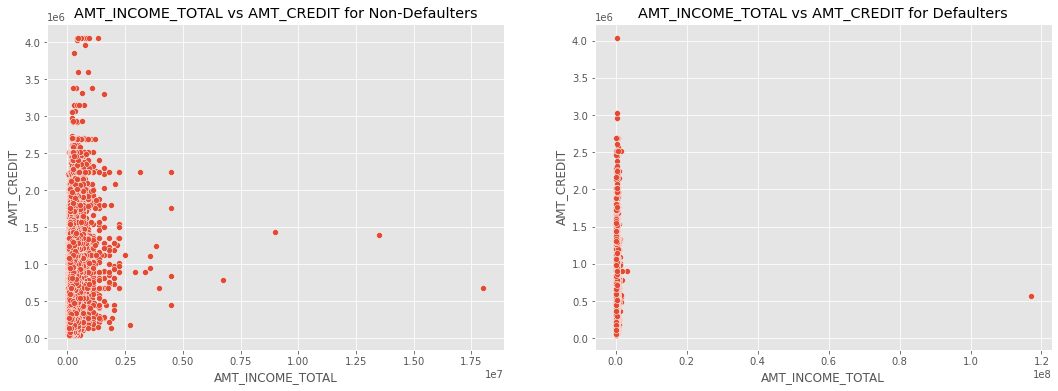

In [81]:
bivariplot("AMT_INCOME_TOTAL","AMT_CREDIT")

We can see that the density in the higher left corner to Non-Defaulters, so the people whose income is less likely apply more and the AMT_CREDIT is more. We can observe that larger families with less income has AMT_CREDIT non-default more often.

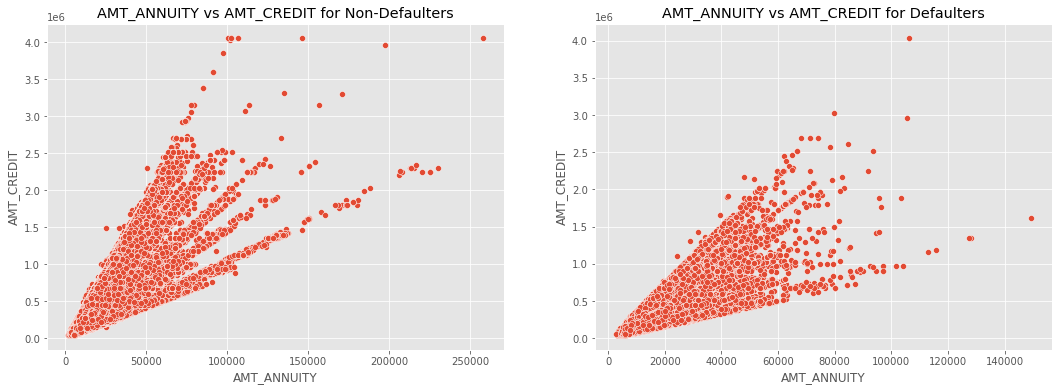

In [82]:
bivariplot("AMT_ANNUITY","AMT_CREDIT")

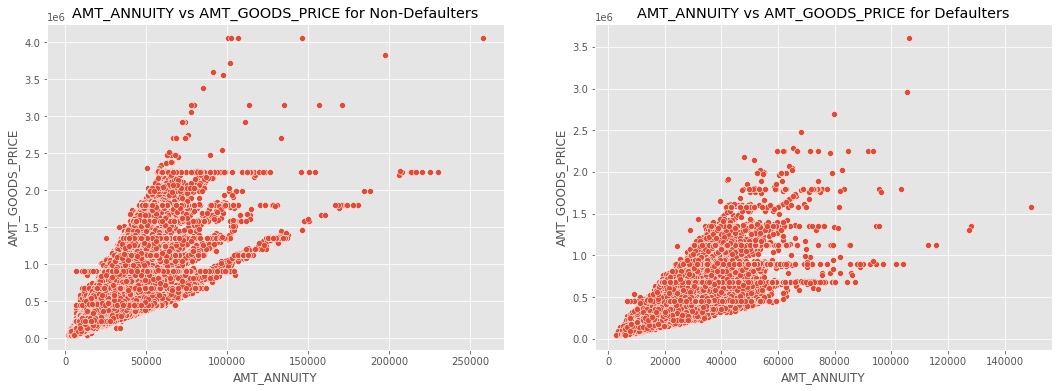

In [83]:
bivariplot("AMT_ANNUITY","AMT_GOODS_PRICE")

### Data Analysis for previous application data

In [84]:
# Read the previous application data
df1 = pd.read_csv("previous_application.csv")

### Routine Check

In [85]:
# Head of the dataset 
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [86]:
# Tail of the dataset 
df1.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest            365243.0        -1457.0   
1670212             Cash X-Sell: low            365243.0        -1155.0   
1670213          Cash X-Sell: middle            365243.0        -1163.0   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
1670209                     362.0         -358.0           -351.0   
1670210                   -1274.0        -1304.0          -1297.0   
1670211                   -1187.0        -1187.0          -1181.0   
1670212                    -825.0         -825.0           -817.0   
1670213                     247.0         -443.0           -423.0   

        NFLAG_INSURED_ON_APPROVAL  
1670209                       0.0  
1670210                       0.0  
1670211                       0.0  
1670212                       1.0  
1670213                       0.0  

[5 rows x 37 columns]

In [87]:
# Shape of the dataset
df1.shape

(1670214, 37)

In [88]:
# Describe of the dataset
df1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [89]:
# Info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [90]:
# check the null values
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [91]:
# check the percentage of null values
df1.isnull().sum()/(len(df1))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [92]:
#check the columns having null values above 50%
df1.columns[((df1.isnull().sum()/(len(df1))*100) > 50)]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [93]:
# Drop the columns having null values above 50 %
df1.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],inplace=True,axis=1)

In [94]:
# Info check
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [95]:
# check the dtype == "object" of the dataset
list(df1.columns[df1.dtypes=="object"])

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

### Univariate Analysis

In [96]:
# Univariate Analysis for categorical
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of NAME_CONTRACT_TYPE")
plt.show()

From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

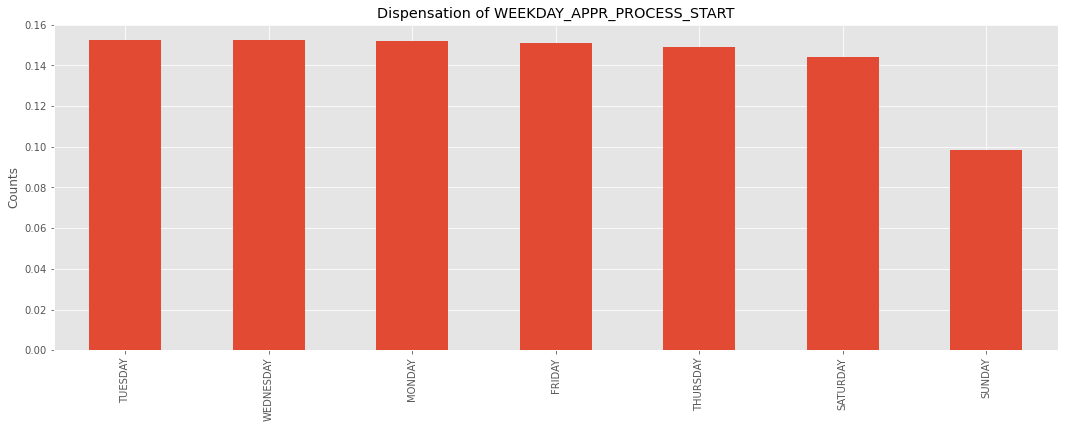

In [97]:
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of WEEKDAY_APPR_PROCESS_START")
plt.show()

In [98]:
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of NAME_CONTRACT_STATUS")
plt.show()

From the above chart, we can conclude that, most of the applications are approved in the previous application. Although the cancelled and refused are less often.

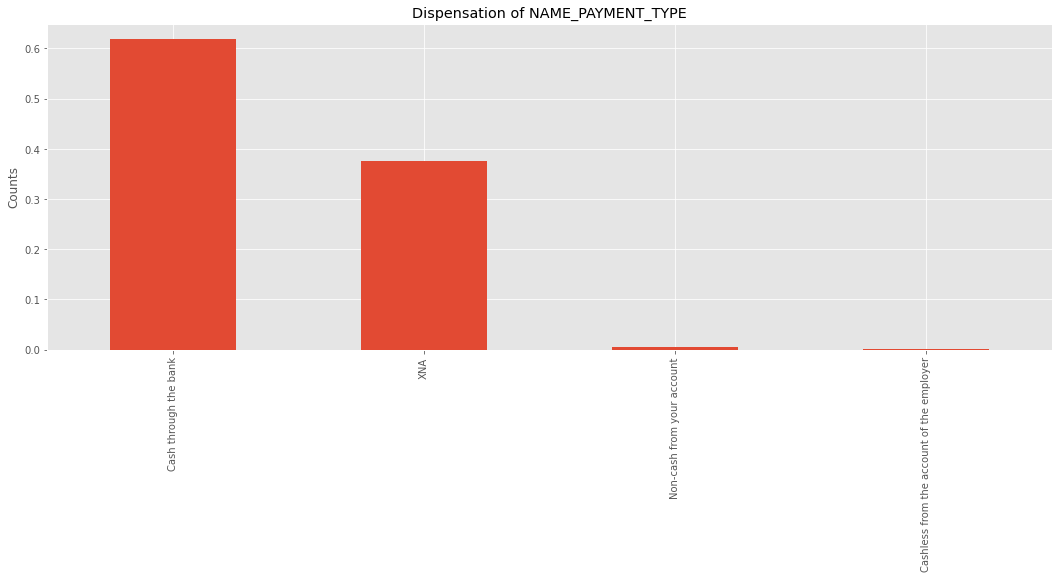

In [99]:
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of NAME_PAYMENT_TYPE")
plt.show()

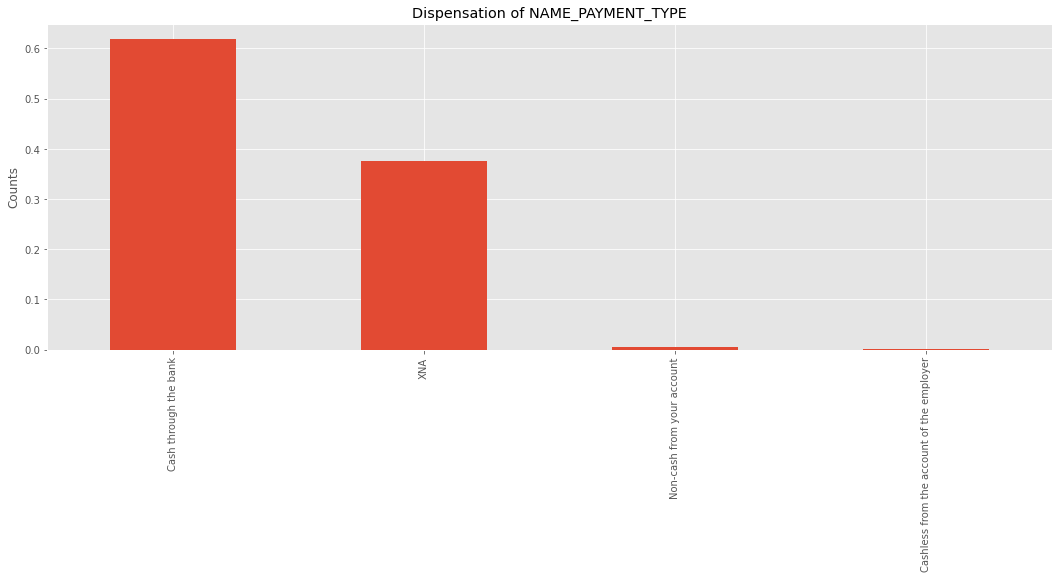

In [100]:
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of NAME_PAYMENT_TYPE")
plt.show()

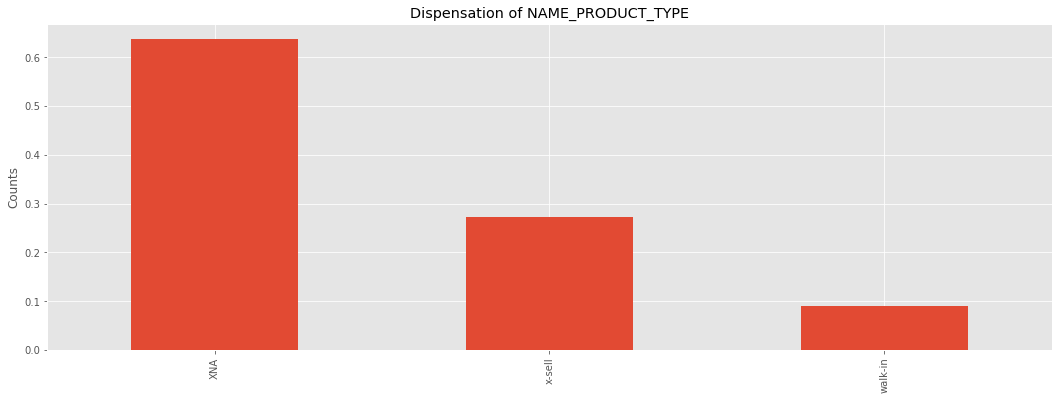

In [101]:
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of NAME_PRODUCT_TYPE")
plt.show()

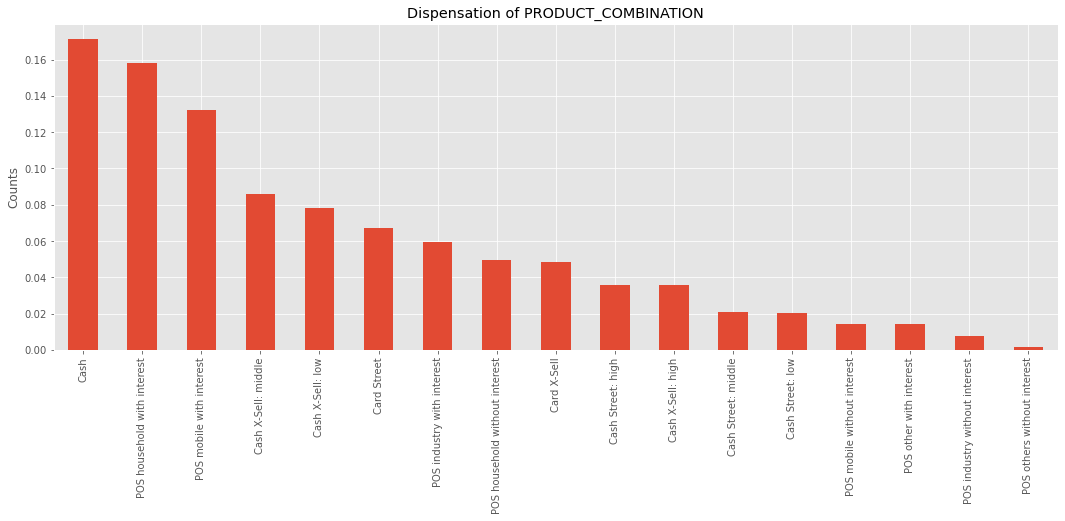

In [102]:
plt.style.use("ggplot")
fig,ax = plt.subplots(1,1,figsize=(18,6))
df1.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar()
plt.ylabel("Counts")
plt.title(f"Dispensation of PRODUCT_COMBINATION")
plt.show()

In [103]:
# List of columns dtype=="float"
list(df1.columns[df1.dtypes=="float"])

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [104]:
# List of columns dtypes=="int64"
list(df1.columns[df1.dtypes=="int64"])

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA']

### Correlation and Multivariate analysis

In [105]:
# Correlation 
df1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']].corr().abs()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY          1.000000         0.808872    0.816429         0.820895   
AMT_APPLICATION      0.808872         1.000000    0.975824         0.999884   
AMT_CREDIT           0.816429         0.975824    1.000000         0.993087   
AMT_GOODS_PRICE      0.820895         0.999884    0.993087         1.000000   
SELLERPLACE_AREA     0.015027         0.007649    0.009567         0.015842   

                  SELLERPLACE_AREA  
AMT_ANNUITY               0.015027  
AMT_APPLICATION           0.007649  
AMT_CREDIT                0.009567  
AMT_GOODS_PRICE           0.015842  
SELLERPLACE_AREA          1.000000

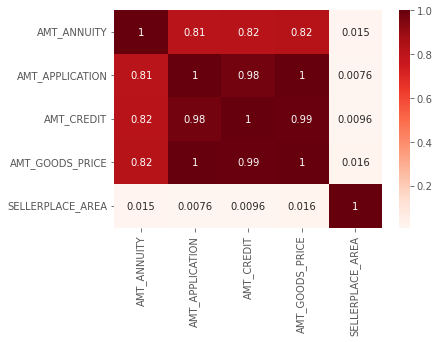

In [106]:
# correlation heatmap
sns.heatmap(df1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']].corr().abs(),annot=True,cmap="Reds")
plt.show()

As the heatmap clears the view the region amt credit and amt goods price are much darker then other.

### Bivariate Analysis

In [107]:
# Bivariate analysis by pairplot
sns.pairplot(df1[["AMT_APPLICATION","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]],diag_kind="kde",plot_kws={"alpha":0.4,"s":80,"edgecolor":"k"},size=4)
plt.show()

### Merging of both the dataset "application data" and "previous data"

In [108]:
# Merging of file
New_df = pd.merge(df,df1,how="left",on=["SK_ID_CURR"])

In [109]:
# Shape of dataset after merge
New_df.shape

(1430100, 105)

In [110]:
# Head of data after merge
New_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans        Male            N   
1      100003       0           Cash loans      Female            N   
2      100003       0           Cash loans      Female            N   
3      100003       0           Cash loans      Female            N   
4      100004       0      Revolving loans        Male            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 105 columns]

In [111]:
# Info of dataset after merge
New_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 105 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE_x          object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT_x                  float64
 9    AMT_ANNUITY_x                 float64
 10   AMT_GOODS_PRICE_x             float64
 11   NAME_TYPE_SUITE_x             object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   

### Univariate Analysis for the after merging the both datasets

In [112]:
def mergeuniplot(Var1,Var2):
    plt.style.use('ggplot')
    sns.despine
    New1 = New_df.pivot_table(values='SK_ID_CURR', 
                      index=Var1,
                      columns=Var2,
                      aggfunc='count')
    New1=New1.div(New1.sum(axis=1),axis='rows')*100
    sns.set()
    New1.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Var1} on Loan Approval')
    plt.xlabel(f'{Var1}')
    plt.ylabel(f'{Var2}%')
    plt.show()

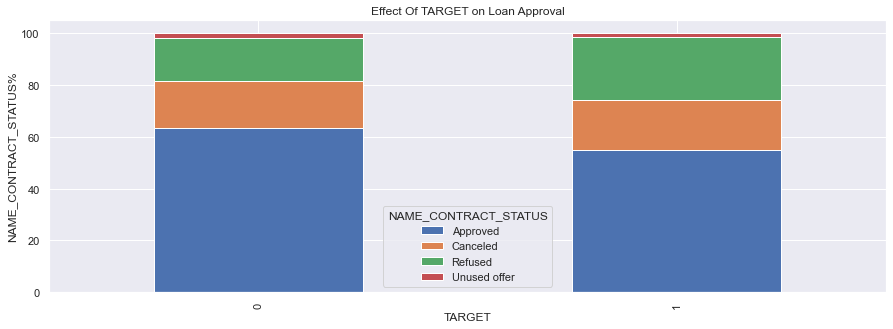

In [113]:
mergeuniplot("TARGET","NAME_CONTRACT_STATUS")

Target variable (0 - Non Defaulter 1 - Defaulter )

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.